<a href="https://colab.research.google.com/github/psykeefuego/Parkinsons-Stage-Prognosis/blob/main/UPDRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage Prognosis in Parkinson's Disease 🦠🧠

This notebook explores the application of Python-based machine learning and data science libraries to develop a predictive model for Parkinson's disease progression. The model aims to predict the total UPDRS score of Parkinson's disease based on medical attributes and clinical scores.

*The approach followed is:*
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Evaluation


## 1. Problem Definition:

In a statement,
> Given a patient's clinical parameters, can we predict the stage of Parkinson's disease progression?

##2. Data:

* The original data is from the UPDRS dataset available on Kaggle, containing clinical scores and medical attributes related to Parkinson's disease progression.
* There is also a version of it available on the UCI Machine Learning Repository.

## 3. Evaluation:

> The aim is to achieve an accuracy of approximately 98.5% or higher by implementing basic machine learning algorithms

## 4. Features:

The dataset includes various features such as:

* **subject** - Integer that uniquely identifies each subject

* **age** - Age in years

* **sex** - ( 0: male, 1: female)

* **motor UPDRS score** - This column contains scores related to the motor aspects of the Unified Parkinson's Disease Rating Scale (UPDRS).The motor section assesses various aspects of motor function, such as tremors, rigidity, bradykinesia (slowness of movement), and postural instability.

* **total UPDRS score** - This column contains the total UPDRS scores, which combine both motor and non-motor aspects of the UPDRS assessment. It provides an overall measure of the severity of Parkinson's disease.

* **jitter measurements** - Jitter is a measure of the variation in the timing of vocal cord vibrations during speech. In the context of Parkinson's disease, jitter measurements is used to assess vocal cord function, which can be affected by the disease and may contribute to speech difficulties.
>
  * `Jitter(Abs)`
  * `Jitter (%)`
  * `Jitter: RAP`
  * `Jitter: PPQ5`
  * `Jitter: DDP`



* **shimmer measurements** - Shimmer is a measure of the variation in the amplitude of vocal cord vibrations during speech. Similar to jitter, shimmer measurements can provide insights into vocal cord function.
>
  * `Shimmer (dB)`
  * `Shimmer: APQ3`
  * `Shimmer: APQ5`
  * `Shimmer: APQ11`
  * `Shimmer: DDA`


* **NHR** - The Noise-to-Harmonics Ratio (NHR) is a measure of the ratio of non-harmonic to harmonic components in a voice signal. I

* **HNR** - The Harmonics-to-Noise Ratio (HNR) is the inverse of the NHR and is used to quantify the clarity of the harmonic structure in a voice signal.

* **RPDE** - The Recurrence Period Density Entropy (RPDE) is a measure of the predictability or regularity of a time series signal.

* **DFA** - The Detrended Fluctuation Analysis (DFA) is a method used to quantify the presence of long-range correlations in a time series signal.

* **PPE** - The Pitch Period Entropy (PPE) is a measure of the variability in the pitch of a voice signal. It can be used to assess the stability of vocal pitch.

* **test_time** - Time since recruitment into the trial. The integer part is the number of days since recruitment


---

# Preparing the tools


> Libraries used:`Pandas, NumPy, Matplotlib, Seaborn and Scikit-learn`

In [1]:
# Import all the tools we need
# Regular EDA(exploratory data analysis)  and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plots appear inside the notebook

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Model Evalutaions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [2]:
df = pd.read_csv('parkinsons_updrs.csv')
df.shape # (rows, columns)

(5875, 22)

# Data Exploration (exploratory data analysis or EDA)

In [3]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
# Assuming df is your DataFrame
columns_to_drop = ['subject#', 'test_time']
df.drop(columns=columns_to_drop, inplace=True)


In [5]:
df.tail()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,61,0,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,61,0,20.513,31.513,0.00282,0.000021,0.00135,0.00166,0.00406,0.01907,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [6]:
df.columns

Index(['age', 'sex', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   motor_UPDRS    5875 non-null   float64
 3   total_UPDRS    5875 non-null   float64
 4   Jitter(%)      5875 non-null   float64
 5   Jitter(Abs)    5875 non-null   float64
 6   Jitter:RAP     5875 non-null   float64
 7   Jitter:PPQ5    5875 non-null   float64
 8   Jitter:DDP     5875 non-null   float64
 9   Shimmer        5875 non-null   float64
 10  Shimmer(dB)    5875 non-null   float64
 11  Shimmer:APQ3   5875 non-null   float64
 12  Shimmer:APQ5   5875 non-null   float64
 13  Shimmer:APQ11  5875 non-null   float64
 14  Shimmer:DDA    5875 non-null   float64
 15  NHR            5875 non-null   float64
 16  HNR            5875 non-null   float64
 17  RPDE           5875 non-null   float64
 18  DFA     

In [8]:
df['total_UPDRS'].value_counts()

total_UPDRS
32.0000    109
19.0000     70
7.0000      54
20.4910     12
26.6180     12
          ... 
27.2910      1
7.1698       1
50.4170      1
29.4580      1
35.4010      1
Name: count, Length: 1129, dtype: int64

In [9]:
df.isna().sum()

age              0
sex              0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

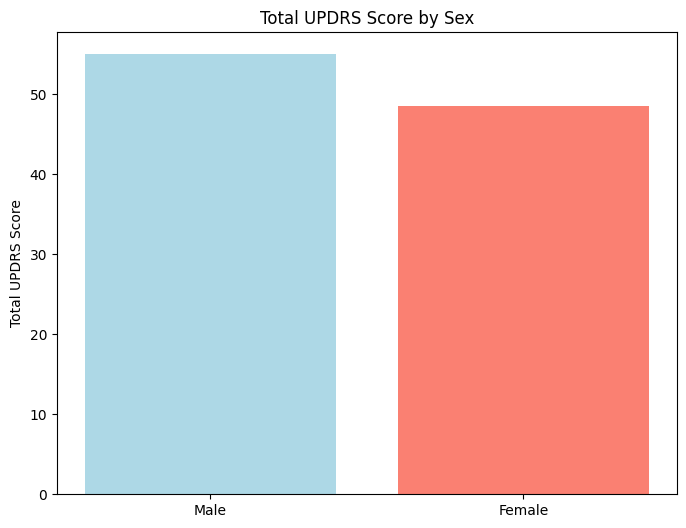

In [10]:
colors=['lightblue','salmon']
plt.figure(figsize=(8, 6))
plt.bar(df['sex'], df['total_UPDRS'], color=[colors[i] for i in df['sex']])
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Total UPDRS Score')
plt.title('Total UPDRS Score by Sex')
plt.show()

In [11]:
df.columns

Index(['age', 'sex', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [12]:
pd.crosstab(df.total_UPDRS,df.sex)

sex,0,1
total_UPDRS,,
7.0000,54,0
7.0881,0,2
7.0882,0,1
7.0883,0,3
7.0982,6,0
...,...,...
54.7270,6,0
54.7890,6,0
54.8680,6,0


# Total UPDRS Score by Age and Sex

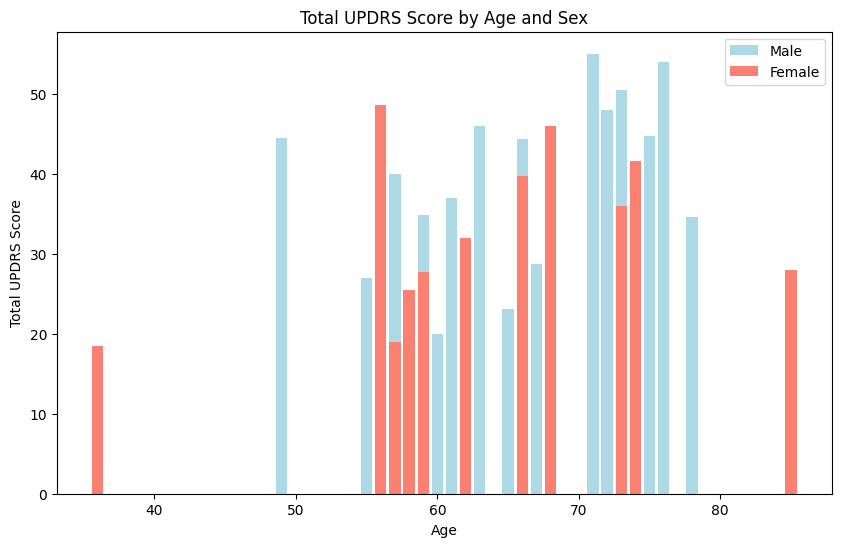

In [13]:
colors = ['lightblue', 'salmon']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for sex = 0 (Male)
plt.bar(df.age[df.sex == 0], df.total_UPDRS[df.sex == 0], color='lightblue', label='Male')

# Scatter plot for sex = 1 (Female)
plt.bar(df.age[df.sex == 1], df.total_UPDRS[df.sex == 1], color='salmon', label='Female')

# Adding some helpful info
plt.title('Total UPDRS Score by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Total UPDRS Score')
plt.legend()
plt.show()

# Correlation among the various features

In [14]:
# make a correlation matrix
df.corr()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
age,1.000000,-0.041602,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,-0.041602,1.000000,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,0.076703,0.058736,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
motor_UPDRS,0.273665,-0.031205,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,0.072698,0.102349,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.310290,-0.096559,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.023071,0.051422,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.035691,-0.154645,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.010255,0.076718,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.013199,0.087995,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.010258,0.076703,0.072698,0.064027,0.984184,0.844630,1.000000,0.947203,1.000000,0.681734,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660
Shimmer,0.101554,0.058736,0.102349,0.092141,0.709791,0.649046,0.681729,0.732747,0.681734,1.000000,0.992334,0.979828,0.984904,0.935457,0.979827,0.795158,-0.801416,0.468235,0.132540,0.615709


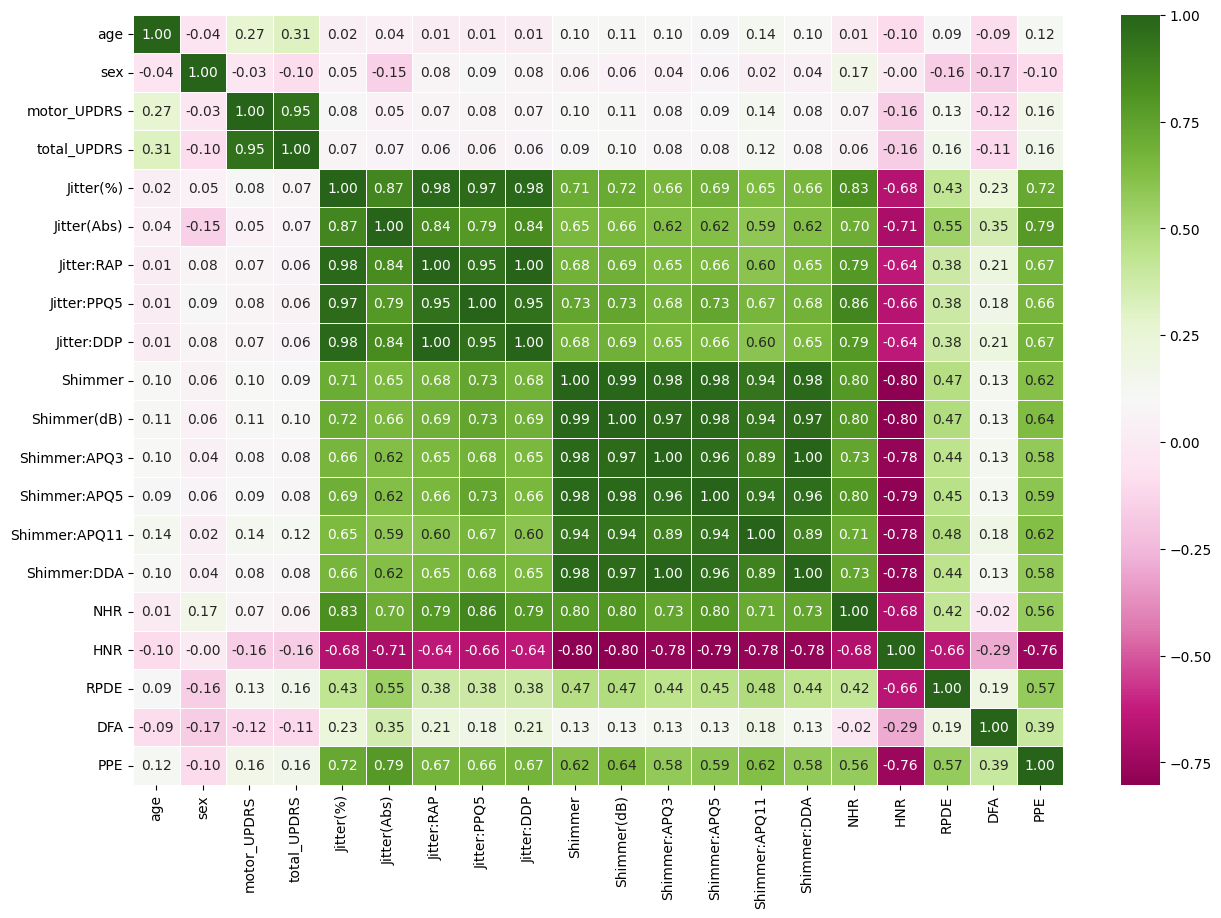

In [15]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='PiYG',
            ax=ax)  # Use the 'ax' parameter to specify the axis


plt.show()

# 5. Modelling    

In [16]:
df.head()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [17]:
X = df.drop('total_UPDRS', axis=1)

y = df.total_UPDRS

In [18]:
X

,age,sex,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,22.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,21.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,21.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,21.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [19]:
y

0       34.398
1       34.894
2       35.389
3       35.810
4       36.375
         ...  
5870    33.485
5871    32.988
5872    32.495
5873    32.007
5874    31.513
Name: total_UPDRS, Length: 5875, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
# splitting data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2)

In [21]:
len(X_train), len(y_train)

(4700, 4700)

In [22]:
from sklearn import linear_model

In [23]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Sample data for demonstration
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Put models in a dictionary
models = {
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'SVR (Linear Kernel)': SVR(kernel='linear'),
    'SVR (RBF Kernel)': SVR(kernel='rbf'),
    'Ridge Regression': Ridge(),
    'Ensemble Regression': VotingRegressor(estimators=[
        ('rf', RandomForestRegressor()),
        ('ridge', Ridge()),
        ('lasso', Lasso())
    ])
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models.

    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set the random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Fit and score the models
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print(model_scores)


{'Lasso': 0.999709881918587, 'Elastic Net': 0.8778885900598832, 'SVR (Linear Kernel)': 0.9999996804690999, 'SVR (RBF Kernel)': 0.08677360155322911, 'Ridge Regression': 0.9999980222806458, 'Ensemble Regression': 0.9674574329879781}


In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Lasso': 0.999709881918587,
 'Elastic Net': 0.8778885900598832,
 'SVR (Linear Kernel)': 0.9999996804690999,
 'SVR (RBF Kernel)': 0.08677360155322911,
 'Ridge Regression': 0.9999980222806458,
 'Ensemble Regression': 0.9674574329879781}

# 6. Evaluation and Model Comparison

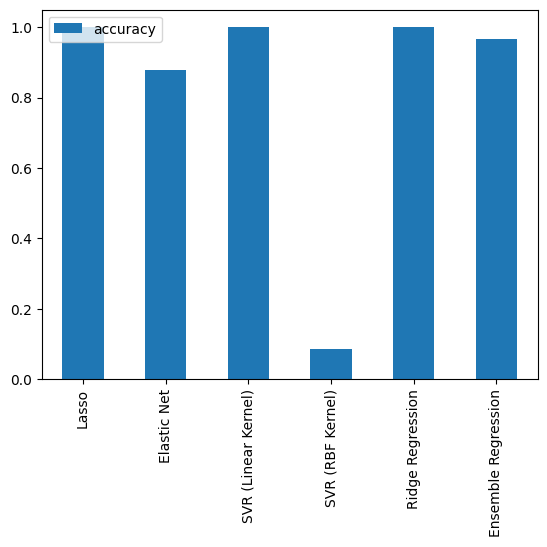

In [25]:
model_compare  = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [26]:
# sort the model_scores dictionary by values and get the top two models
sorted_model_scores = sorted(model_scores.items(), key=lambda item: item[1], reverse=True)
top_two_models = sorted_model_scores[:2]

# print the two models with the greatest accuracy
for model, score in top_two_models:
    print(f"Model: {model} with accuracy {score}")

Model: SVR (Linear Kernel) with accuracy 0.9999996804690999
Model: Ridge Regression with accuracy 0.9999980222806458


In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
final_model = SVR(kernel='linear')
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.8f}")

Mean Absolute Error: 0.0856
Mean Squared Error: 0.0123
Root Mean Squared Error: 0.1110
R-squared: 0.99999968


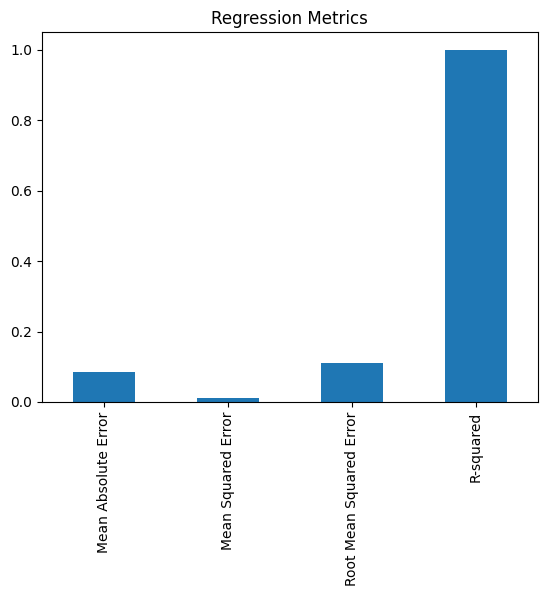

In [29]:
# visualize our metrics
cv_metrics = pd.DataFrame({"Mean Absolute Error":mae,
"Mean Squared Error":mse,
"Root Mean Squared Error":rmse,
"R-squared":r2},index=[0])

cv_metrics.T.plot.bar(title='Regression Metrics',legend=False);

In [30]:
# check coef_
final_model.coef_

array([[ 3.97457633e+01, -3.70712084e-03, -2.66279739e-03,
         1.09892311e-02,  1.99991028e+01,  3.20344812e+01,
        -2.25423711e-03,  6.26476115e+01,  1.71983246e-03,
         6.74463786e+01,  7.24109341e+01,  8.71779651e+01,
         9.21936904e+01,  5.34345226e-03, -2.68741298e-03,
         8.10893343e+01,  9.98554545e-03,  6.97417644e-03,
        -1.10129674e-03,  3.78341742e+01]])

In [31]:
# match the coefs of features to columns
feature_dict = dict(zip(df.columns, list(final_model.coef_[0])))

# model driven exploratory analysis
feature_dict

{'age': 39.74576326786003,
 'sex': -0.003707120844554046,
 'motor_UPDRS': -0.002662797388764959,
 'total_UPDRS': 0.010989231072759731,
 'Jitter(%)': 19.999102785060323,
 'Jitter(Abs)': 32.034481202591124,
 'Jitter:RAP': -0.002254237114817481,
 'Jitter:PPQ5': 62.64761151259275,
 'Jitter:DDP': 0.0017198324587232028,
 'Shimmer': 67.44637862027733,
 'Shimmer(dB)': 72.41093409115496,
 'Shimmer:APQ3': 87.1779651061831,
 'Shimmer:APQ5': 92.19369042092175,
 'Shimmer:APQ11': 0.005343452258460779,
 'Shimmer:DDA': -0.00268741297666375,
 'NHR': 81.08933431417718,
 'HNR': 0.009985545451158817,
 'RPDE': 0.006974176441390423,
 'DFA': -0.001101296735620344,
 'PPE': 37.83417416359349}

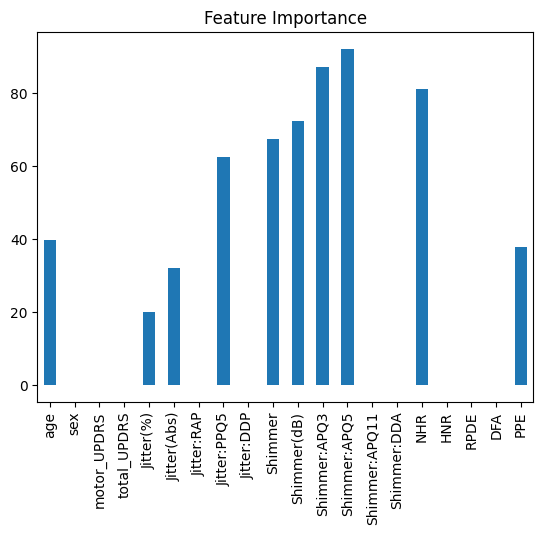

In [32]:
# visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False);

---